In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns
from matplotlib_venn import venn2
import pyvenn.venn as venn
import json

RESULTS_PATH = 'results\significant_genes_'
CELL_TYPES_LIST = ['T cells', 'B cells', 'ILC', 'Monocytes', 'Plasma cells'] #'HSC/MPP', 'DC'
DICT_LIST = ['T_cells', 'B_cells', 'ILC', 'Monocytes', 'Plasma_cells'] #'HSC_MPP', 'DC'

## PBMC cells

In [30]:
genes_df = pd.DataFrame(columns=['cell_type', 'gene', 'regulated', 'MS/HC'])

for cell_type, dict_name in zip(CELL_TYPES_LIST, DICT_LIST):
    dict_genes = json.load(open(RESULTS_PATH + dict_name + '_PBMC.json'))

    # upregulated genes for MS
    genes_df = pd.concat([genes_df, pd.DataFrame({
        'cell_type': cell_type,
        'gene': dict_genes['up_regulated_genes_MS'],
        'regulated': 'upregulated',
        'MS/HC': 'MS'
    })])

    # downregulated genes for MS
    genes_df = pd.concat([genes_df, pd.DataFrame({
        'cell_type': cell_type,
        'gene': dict_genes['down_regulated_genes_MS'],
        'regulated': 'downregulated',
        'MS/HC': 'MS'
    })])

    # upregulated genes for HC
    genes_df = pd.concat([genes_df, pd.DataFrame({
        'cell_type': cell_type,
        'gene': dict_genes['up_regulated_genes_HC'],
        'regulated': 'upregulated',
        'MS/HC': 'HC'
    })])

    # downregulated genes for HC
    genes_df = pd.concat([genes_df, pd.DataFrame({
        'cell_type': cell_type,
        'gene': dict_genes['down_regulated_genes_HC'],
        'regulated': 'downregulated',
        'MS/HC': 'HC'
    })])

In [31]:
genes_df

,cell_type,gene,regulated,MS/HC
0,T cells,MT-CO3,upregulated,MS
1,T cells,MT-ATP6,upregulated,MS
2,T cells,MT-CO2,upregulated,MS
3,T cells,MT-CYB,upregulated,MS
4,T cells,MT-ND4,upregulated,MS
...,...,...,...,...
200,Plasma cells,AC006504.7,downregulated,HC
201,Plasma cells,ITGA10,downregulated,HC
202,Plasma cells,LINC01716,downregulated,HC
203,Plasma cells,TRGJ1,downregulated,HC


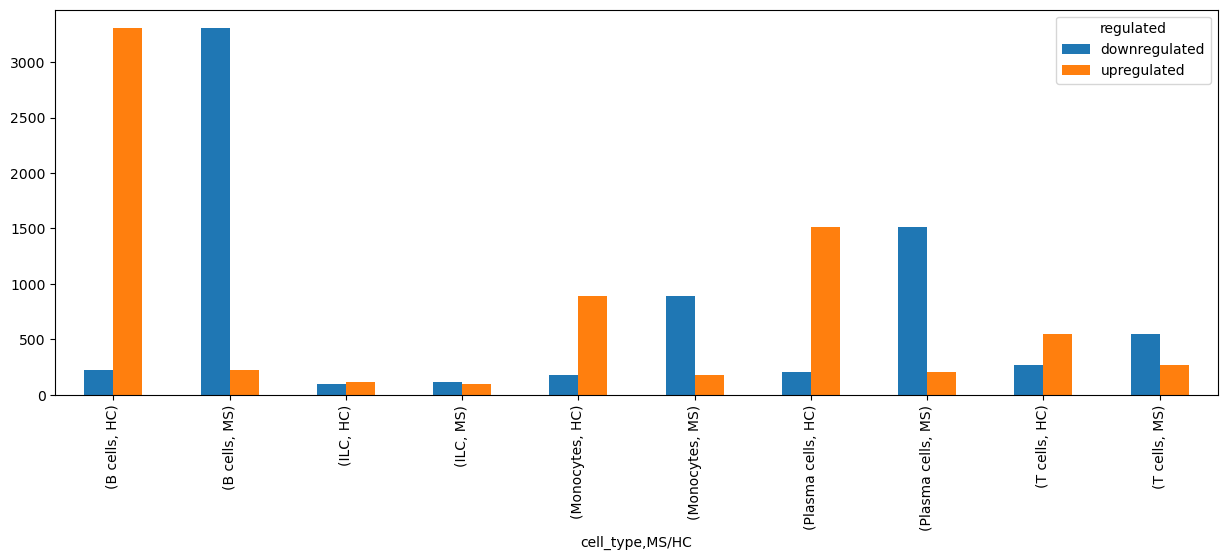

In [32]:
grouped_counts = genes_df.groupby(['cell_type', 'MS/HC', 'regulated']).size().unstack(fill_value=0)
grouped_counts.plot(kind='bar', stacked=False, figsize=(15, 5));

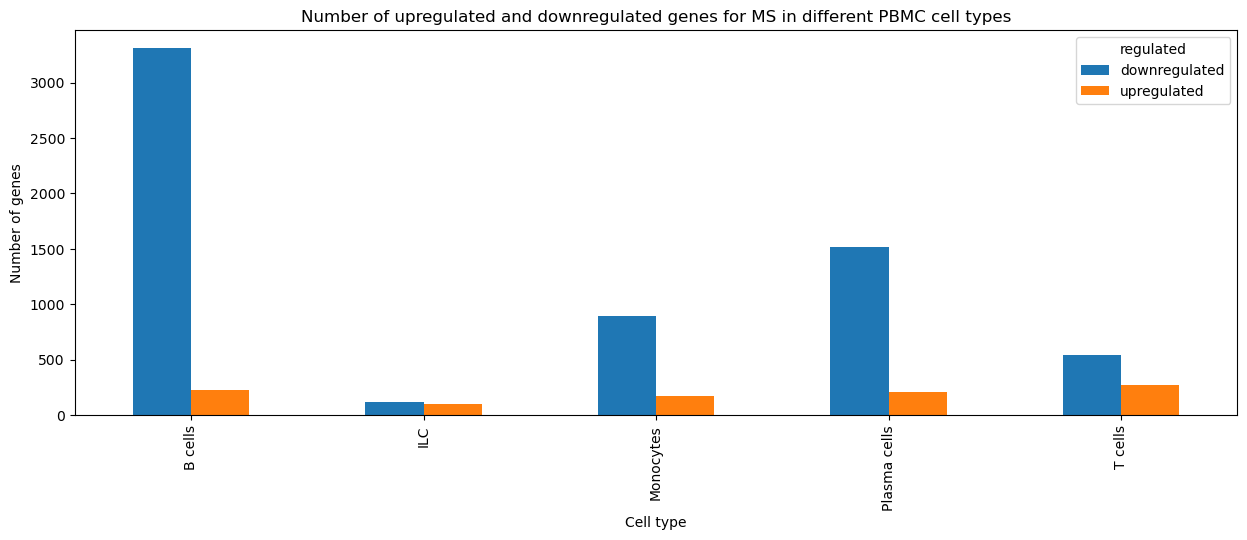

In [33]:
grouped_counts = genes_df[genes_df['MS/HC']=='MS'].groupby(['cell_type', 'regulated']).size().unstack(fill_value=0)
grouped_counts.plot(kind='bar', stacked=False, figsize=(15, 5))
plt.xlabel('Cell type')
plt.ylabel('Number of genes')
plt.title('Number of upregulated and downregulated genes for MS in different PBMC cell types');

In [28]:
grouped_counts

regulated,downregulated,upregulated
cell_type,,
B cells,3309,222
ILC,117,99
Monocytes,891,174
Plasma cells,1513,205
T cells,543,271


<Figure size 640x480 with 0 Axes>

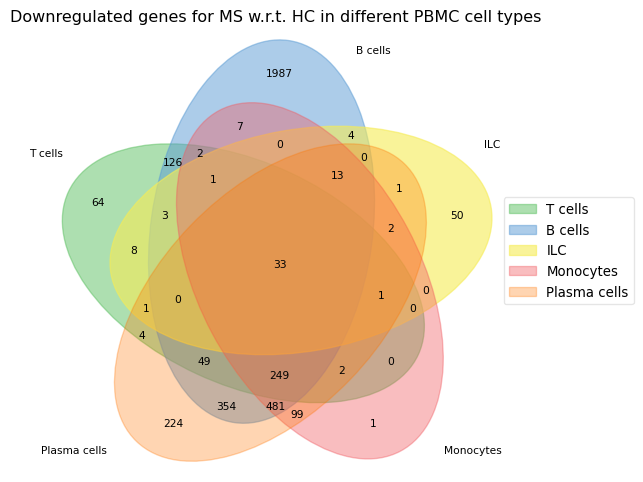

In [6]:
plt.figure()
venn.venn5(venn.get_labels([set(genes_df[(genes_df['cell_type'] == cell_type) & (genes_df['MS/HC'] == 'MS') & (
    genes_df['regulated'] == 'downregulated')]['gene']) for cell_type in CELL_TYPES_LIST]), names=CELL_TYPES_LIST,
    figsize=(8, 6), fontsize=8)
plt.title('Downregulated genes for MS w.r.t. HC in different PBMC cell types')
plt.show()

In [17]:
# list of genes that are downregulated in all cell types
downregulated_genes = set(genes_df[(genes_df['MS/HC'] == 'MS') & (genes_df['regulated'] == 'downregulated')]['gene'])
for cell_type in CELL_TYPES_LIST:
    downregulated_genes = downregulated_genes.intersection(
        set(genes_df[(genes_df['cell_type'] == cell_type) & (genes_df['MS/HC'] == 'MS') & (
        genes_df['regulated'] == 'downregulated')]['gene']))
downregulated_genes

{'ARPC1B',
 'ARPC2',
 'ARPC3',
 'ARPC5',
 'ATP5F1E',
 'ATP5MC2',
 'CD63',
 'CD99',
 'CDC42',
 'CFL1',
 'COX5B',
 'COX6B1',
 'COX8A',
 'CYBA',
 'ELOB',
 'EMP3',
 'FTL',
 'GABARAP',
 'GAPDH',
 'GMFG',
 'GNAI2',
 'H3F3A',
 'HCST',
 'HMGB1',
 'IFITM2',
 'IQGAP1',
 'ITGB2',
 'ITM2B',
 'MT-ND2',
 'MT-ND4',
 'MT-ND5',
 'MTRNR2L12',
 'OAZ1',
 'PNRC1',
 'PTMA',
 'RAC1',
 'RHOA',
 'RPL13A',
 'RPL23',
 'RPL31',
 'RPL7',
 'RPLP0',
 'RPS10',
 'RPS17',
 'RPS20',
 'RPS8',
 'S100A11',
 'S100A4',
 'S100A6',
 'SEPTIN7',
 'SERF2',
 'SET',
 'SH3BGRL3',
 'SLC25A6',
 'SRP14',
 'TLN1',
 'TMSB10',
 'TPI1',
 'TPM3',
 'TXNIP',
 'UQCRH',
 'VAMP8',
 'VIM',
 'YBX1'}

<Figure size 640x480 with 0 Axes>

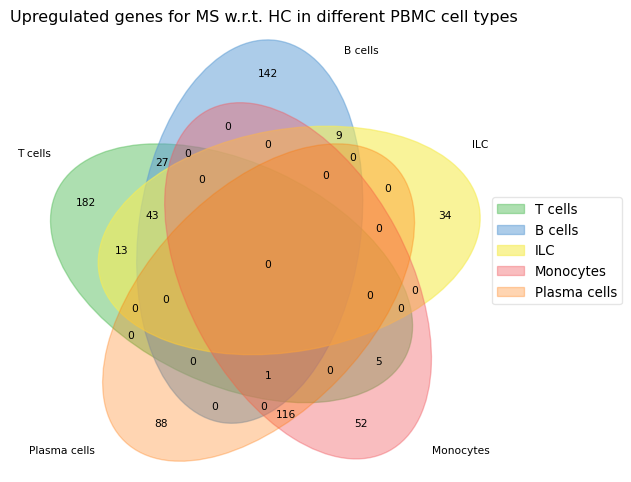

In [7]:
plt.figure()
venn.venn5(venn.get_labels([set(genes_df[(genes_df['cell_type'] == cell_type) & (genes_df['MS/HC'] == 'MS') & (
    genes_df['regulated'] == 'upregulated')]['gene']) for cell_type in CELL_TYPES_LIST]), names=CELL_TYPES_LIST,
    figsize=(8, 6), fontsize=8)
plt.title('Upregulated genes for MS w.r.t. HC in different PBMC cell types')
plt.show()

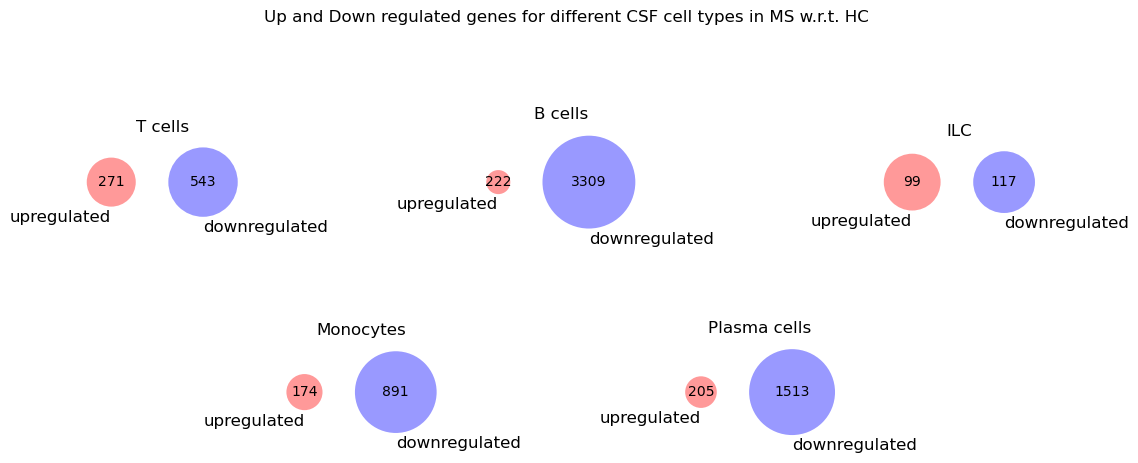

In [8]:
fig = plt.figure(figsize=(15, 5))
gs = GridSpec(2, 6, figure=fig)
axs = [fig.add_subplot(gs[0, i*2]) for i in range(3)]
axs += [fig.add_subplot(gs[1, i*2+1]) for i in range(2)]


for cell_type, ax in zip(CELL_TYPES_LIST, axs):
    # for MS, upregulated and downregulated (HC upregulated are MS downregulated and vice versa)
    venn2(subsets=(
        set(genes_df[(genes_df['cell_type'] == cell_type) & (genes_df['MS/HC'] == 'MS') &
        (genes_df['regulated'] == 'upregulated')]['gene']),
        set(genes_df[(genes_df['cell_type'] == cell_type) & (genes_df['MS/HC'] == 'MS') &
        (genes_df['regulated'] == 'downregulated')]['gene'])),
        set_labels=('upregulated', 'downregulated'), 
        ax=ax, alpha=0.4, set_colors=('r', 'b'))
    ax.set_title(cell_type)

fig.suptitle('Up and Down regulated genes for different CSF cell types in MS w.r.t. HC', x=0.45, y=1.05)
#plt.tight_layout()
plt.show()


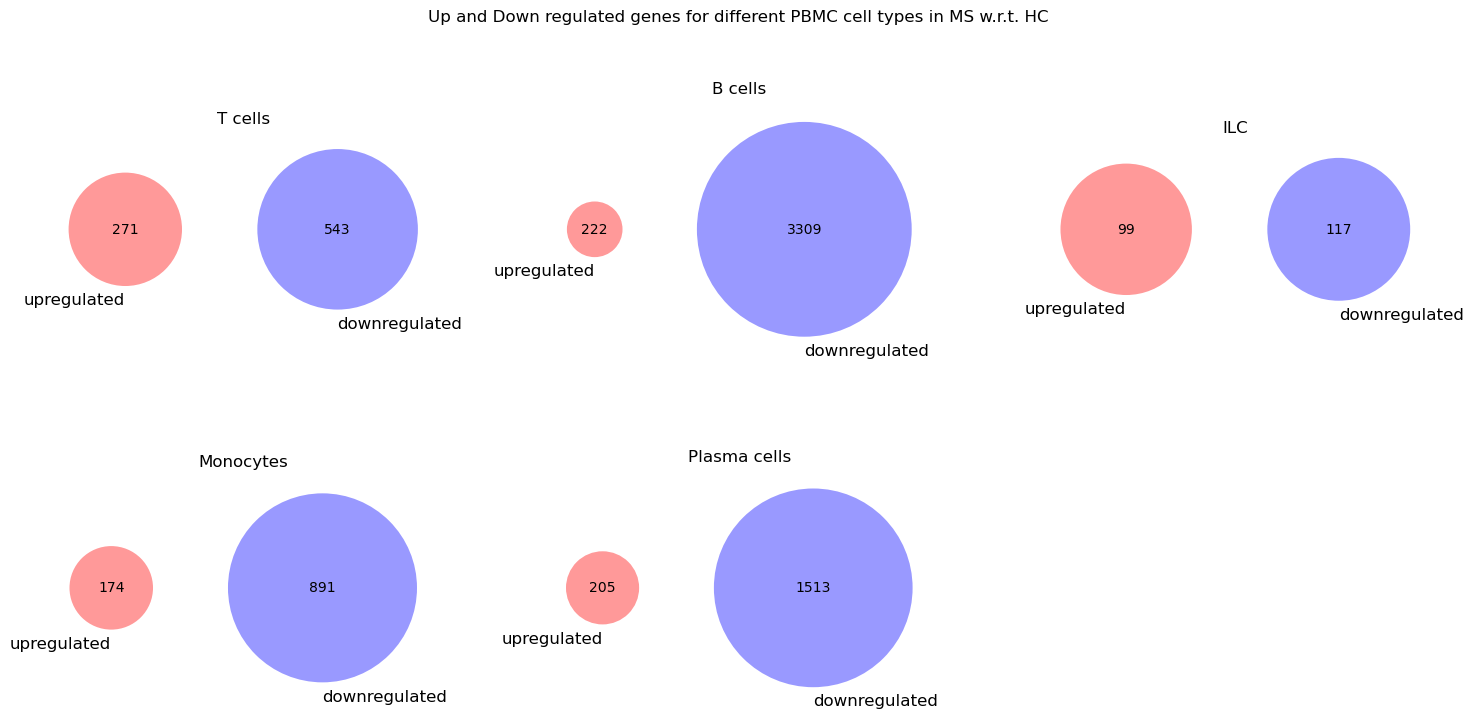

In [9]:
fig, axs = plt.subplots(2, 3, figsize=(15, 8))
for cell_type, ax in zip(CELL_TYPES_LIST, axs.flatten()):
    # for MS, upregulated and downregulated (HC upregulated are MS downregulated and vice versa)
    venn2(subsets=(
        set(genes_df[(genes_df['cell_type'] == cell_type) & (genes_df['MS/HC'] == 'MS') &
        (genes_df['regulated'] == 'upregulated')]['gene']),
        set(genes_df[(genes_df['cell_type'] == cell_type) & (genes_df['MS/HC'] == 'MS') &
        (genes_df['regulated'] == 'downregulated')]['gene'])),
        set_labels=('upregulated', 'downregulated'), 
        ax=ax, alpha=0.4, set_colors=('r', 'b'))
    ax.set_title(cell_type)

axs.flatten()[-1].remove()
fig.suptitle('Up and Down regulated genes for different PBMC cell types in MS w.r.t. HC')
plt.tight_layout()
plt.show()

## CSF cells

In [10]:
genes_df = pd.DataFrame(columns=['cell_type', 'gene', 'regulated', 'MS/HC'])

for cell_type, dict_name in zip(CELL_TYPES_LIST, DICT_LIST):
    dict_genes = json.load(open(RESULTS_PATH + dict_name + '_CSF.json'))

    # upregulated genes for MS
    genes_df = pd.concat([genes_df, pd.DataFrame({
        'cell_type': cell_type,
        'gene': dict_genes['up_regulated_genes_MS'],
        'regulated': 'upregulated',
        'MS/HC': 'MS'
    })])

    # downregulated genes for MS
    genes_df = pd.concat([genes_df, pd.DataFrame({
        'cell_type': cell_type,
        'gene': dict_genes['down_regulated_genes_MS'],
        'regulated': 'downregulated',
        'MS/HC': 'MS'
    })])

    # upregulated genes for HC
    genes_df = pd.concat([genes_df, pd.DataFrame({
        'cell_type': cell_type,
        'gene': dict_genes['up_regulated_genes_HC'],
        'regulated': 'upregulated',
        'MS/HC': 'HC'
    })])

    # downregulated genes for HC
    genes_df = pd.concat([genes_df, pd.DataFrame({
        'cell_type': cell_type,
        'gene': dict_genes['down_regulated_genes_HC'],
        'regulated': 'downregulated',
        'MS/HC': 'HC'
    })])

In [11]:
genes_df

,cell_type,gene,regulated,MS/HC
0,T cells,ESR2,upregulated,MS
1,T cells,AL359475.1,upregulated,MS
2,T cells,PCDHA2,upregulated,MS
3,T cells,ETF1,upregulated,MS
4,T cells,TEX52,upregulated,MS
...,...,...,...,...
14,Plasma cells,LINC02105,downregulated,HC
15,Plasma cells,PCDHA2,downregulated,HC
16,Plasma cells,ESR2,downregulated,HC
17,Plasma cells,PCDHA4,downregulated,HC


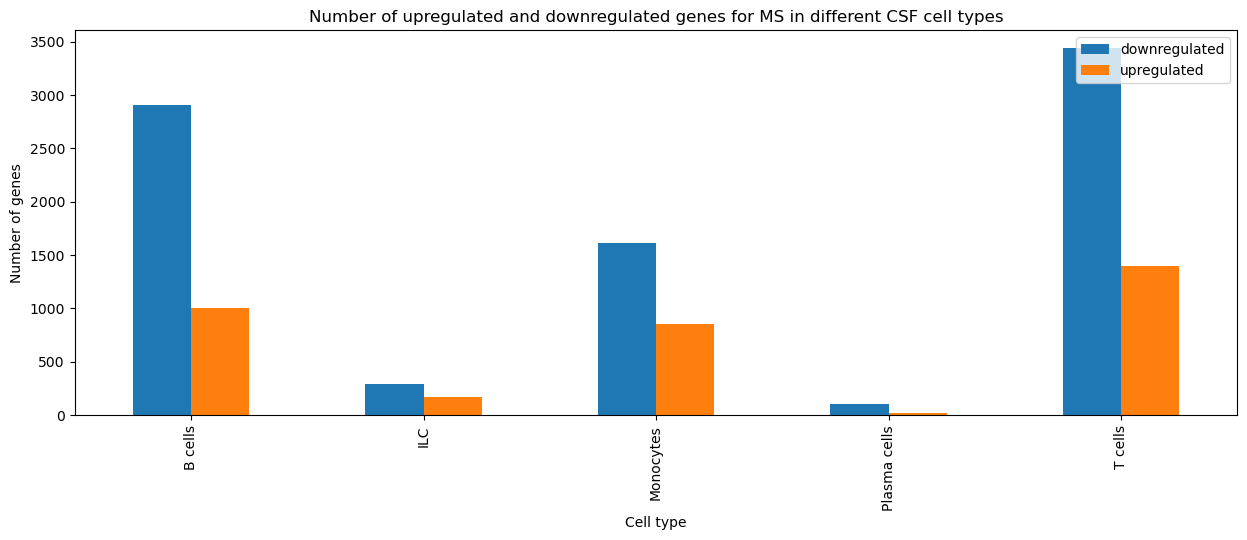

In [21]:
grouped_counts = genes_df[genes_df['MS/HC']=='MS'].groupby(['cell_type', 'regulated']).size().unstack(fill_value=0)
grouped_counts.plot(kind='bar', stacked=False, figsize=(15, 5))
plt.xlabel('Cell type')
plt.ylabel('Number of genes')
plt.legend(loc='upper right')
plt.title('Number of upregulated and downregulated genes for MS in different CSF cell types');

In [22]:
grouped_counts

regulated,downregulated,upregulated
cell_type,,
B cells,2907,1008
ILC,287,165
Monocytes,1610,853
Plasma cells,108,19
T cells,3436,1395


<Figure size 640x480 with 0 Axes>

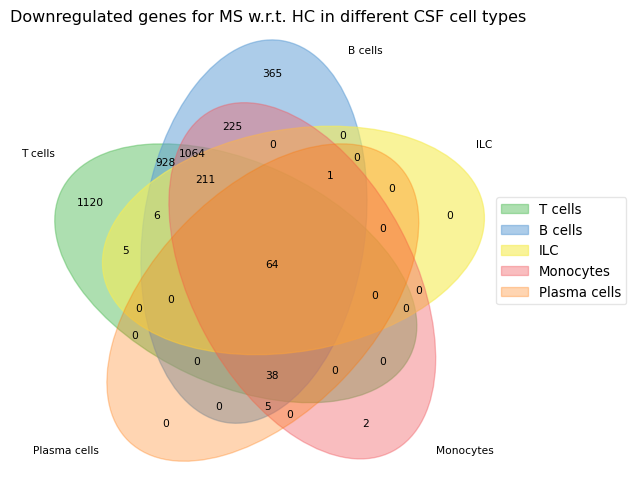

In [13]:
plt.figure()
venn.venn5(venn.get_labels([set(genes_df[(genes_df['cell_type'] == cell_type) & (genes_df['MS/HC'] == 'MS') & (
    genes_df['regulated'] == 'downregulated')]['gene']) for cell_type in CELL_TYPES_LIST]), names=CELL_TYPES_LIST,
    figsize=(8, 6), fontsize=8)
plt.title('Downregulated genes for MS w.r.t. HC in different CSF cell types')
plt.show()

<Figure size 640x480 with 0 Axes>

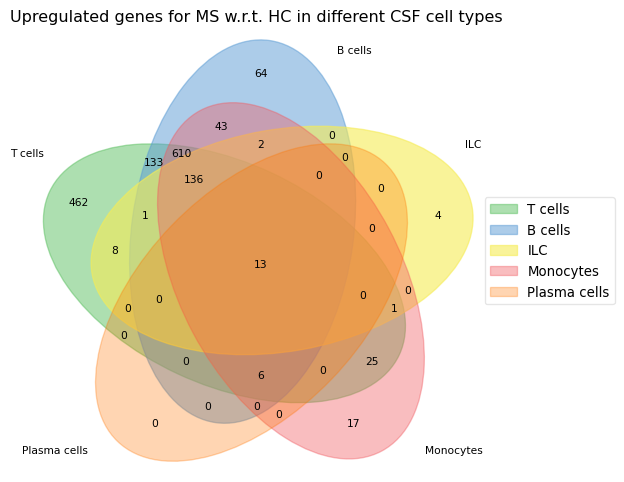

In [14]:
plt.figure()
venn.venn5(venn.get_labels([set(genes_df[(genes_df['cell_type'] == cell_type) & (genes_df['MS/HC'] == 'MS') & (
    genes_df['regulated'] == 'upregulated')]['gene']) for cell_type in CELL_TYPES_LIST]), names=CELL_TYPES_LIST,
    figsize=(8, 6), fontsize=8)
plt.title('Upregulated genes for MS w.r.t. HC in different CSF cell types')
plt.show()

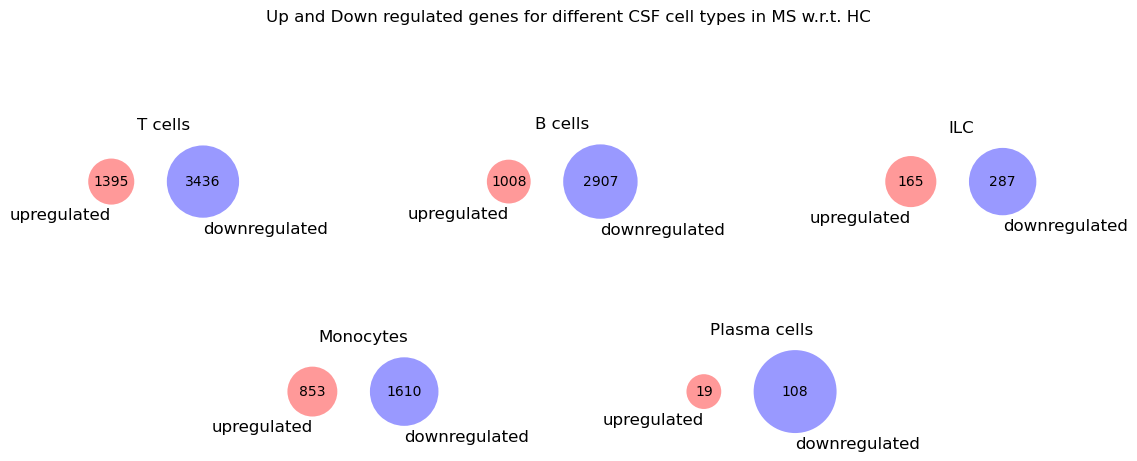

In [15]:
fig = plt.figure(figsize=(15, 5))
gs = GridSpec(2, 6, figure=fig)
axs = [fig.add_subplot(gs[0, i*2]) for i in range(3)]
axs += [fig.add_subplot(gs[1, i*2+1]) for i in range(2)]


for cell_type, ax in zip(CELL_TYPES_LIST, axs):
    # for MS, upregulated and downregulated (HC upregulated are MS downregulated and vice versa)
    venn2(subsets=(
        set(genes_df[(genes_df['cell_type'] == cell_type) & (genes_df['MS/HC'] == 'MS') &
        (genes_df['regulated'] == 'upregulated')]['gene']),
        set(genes_df[(genes_df['cell_type'] == cell_type) & (genes_df['MS/HC'] == 'MS') &
        (genes_df['regulated'] == 'downregulated')]['gene'])),
        set_labels=('upregulated', 'downregulated'), 
        ax=ax, alpha=0.4, set_colors=('r', 'b'))
    ax.set_title(cell_type)

fig.suptitle('Up and Down regulated genes for different CSF cell types in MS w.r.t. HC', x=0.45, y=1.05)
#plt.tight_layout()
plt.show()


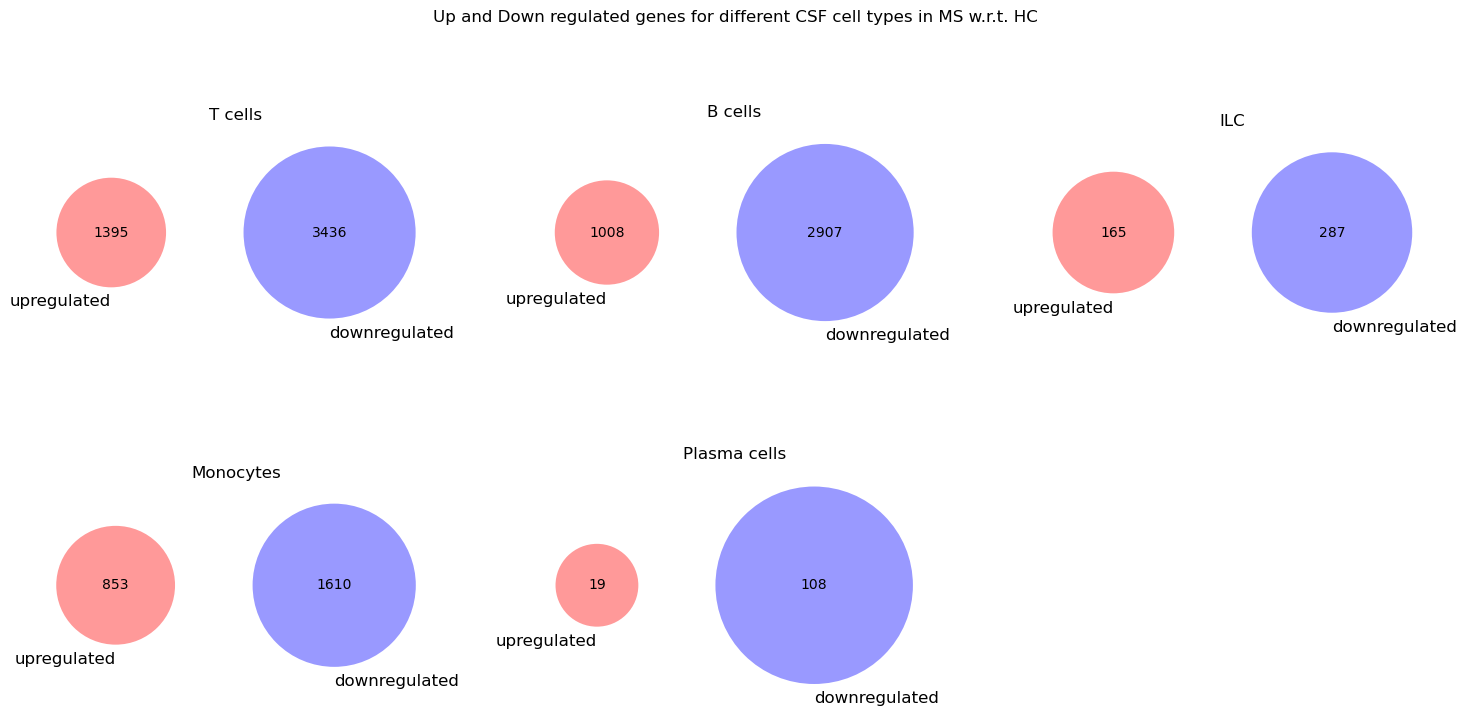

In [16]:
fig, axs = plt.subplots(2, 3, figsize=(15, 8))
for cell_type, ax in zip(CELL_TYPES_LIST, axs.flatten()):
    # for MS, upregulated and downregulated (HC upregulated are MS downregulated and vice versa)
    venn2(subsets=(
        set(genes_df[(genes_df['cell_type'] == cell_type) & (genes_df['MS/HC'] == 'MS') &
        (genes_df['regulated'] == 'upregulated')]['gene']),
        set(genes_df[(genes_df['cell_type'] == cell_type) & (genes_df['MS/HC'] == 'MS') &
        (genes_df['regulated'] == 'downregulated')]['gene'])),
        set_labels=('upregulated', 'downregulated'), 
        ax=ax, alpha=0.4, set_colors=('r', 'b'))
    ax.set_title(cell_type)

axs.flatten()[-1].remove()
fig.suptitle('Up and Down regulated genes for different CSF cell types in MS w.r.t. HC')
plt.tight_layout()
plt.show()